**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**NOTEBOOK DESCRIPTION**

This notebook will tell us how K-means clustering, one of the unsupervised machine learning techniques, works and how we can use scikit-learn library to perform it.

# Brief Description About K-means Clustering

K-means clustering is a clustering algorithm that clusters data with similar features together with the help of Euclidean distance. 

<img src="figures/kmeans-clustering.gif" width="720" height="720"/>

As the above animation illustrates, the K-means clustering step-by-step is as follows:
> 1. Choose number of clusters / centroids (k) 
> 2. Initialize centroids randomly to data points
> 3. Map each data points to closest centroid
> 4. Move centroids to the center 
> 5. Repeat steps 3 & 4 until centroids stop moving


# Explanation about The Data

We will use Customers.csv file as our dataset. The dataset consists of 3 columns:
> - CustomerID : id of each customer. We will not use this column when performing our clustering technique  
> - Income : customer annual income in thousand USD   
> - SpendingScore : customer spending score, ranges from 0-100 

We are going to use the last two columns as our features to identify clusters in the dataset.

# Let's Code

## Import Packages/Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load/Generate Dataset

In [2]:
df = pd.read_csv('dataset/Customers.csv')
df.head()

,CustomerID,Income,SpendingScore
0,1,15.0,39
1,2,15.0,81
2,3,16.0,6
3,4,16.0,77
4,5,17.0,40


## Quick Look of the Dataset

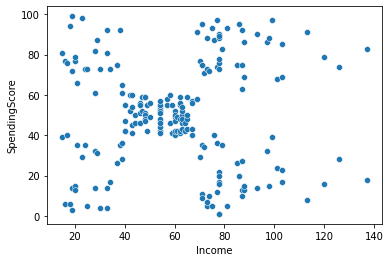

In [3]:
ax = sns.scatterplot(data=df, x='Income', y='SpendingScore')

From the scatter plot above, we can see that there are about 5 clusters in our dataset. One is in the middle and the other are on the each edge of the plot.

## Get Features

In [4]:
X = df.iloc[:, [1, 2]].values
X[:5]

array([[15., 39.],
       [15., 81.],
       [16.,  6.],
       [16., 77.],
       [17., 40.]])

## Perform Elbow Method

we can use Elbow method to determine the optimal value of K (number of clusters). Here we will compute the within cluster sum of square (WCSS) for each number of cluster and we will plot it. 

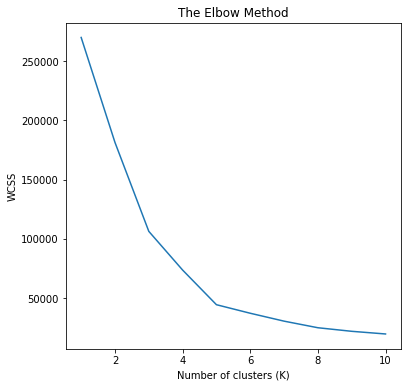

In [5]:
# max number of iteration is equal to sample size
# if we can think the optimal value of K beforehand, we can choose number of iterations to about the value of K
# here we have seen that our dataset apparently formed 5 clusters, so we can choose 10 as our num of iterations
n_iter = 10
wcss = []
for i in range(1, n_iter+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(range(1, n_iter+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

The elbow method plot above tells us that before K=5, WCSS decrease significantly. However after K=5, WCSS does not decrease significantly. Here we can choose 5 as our value of K.

## Train Model & Predict Clusters

In [6]:
# Training the K-Means model on the dataset
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)

# predict / define clusters
clusters = kmeans.fit_predict(X) + 1

## Merge Clusters to Our DataFrame

In [7]:
df['Cluster'] = clusters
df.head()

,CustomerID,Income,SpendingScore,Cluster
0,1,15.0,39,3
1,2,15.0,81,4
2,3,16.0,6,3
3,4,16.0,77,4
4,5,17.0,40,3


## Visualize Clusters

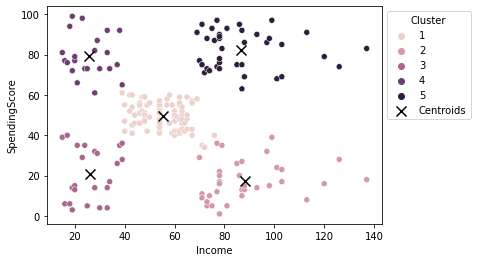

In [8]:
ax = sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='k', marker='x', label='Centroids')
ax.legend(bbox_to_anchor=(1,1), loc="upper left", title='Cluster')

As we can see, K-means clustering did a good job to cluster our dataset.